
# 📊 Bar Plots & One-way ANOVA
Analyze and visualize group differences with bar plots and ANOVA in R.

---

**🗂️ Last updated:** 18 September 2025  
**🐳 Docker image:** `gnasello/datascience-env:2025-09-18`


## 📦 Load Required Packages

In [1]:

library(dataprepUtils)
library(statsUtils)
library(ggplotUtils)


## 🏷️ Customize Plot Labels

In [2]:

title <- "Plot title"
xlabel <- "X-axis label"
ylabel <- "Y-axis label"


## 🎨 Set Colors for Groups

In [3]:

scale_color_manual.values <- c(
  "Blank" = "#8b8c8cff",
  "αCDs" = "#4dbbd5ff",
  "AS" = "#ff6666ff",
  "αCDs + AS" = "#4d9999ff"
)


## 📁 Load Your Data

In [4]:
filetable <- "data.csv"

filename <- tools::file_path_sans_ext(filetable)
df <- read_and_process_data(
  filetable,
  x_col = "x",
  y_col = "y",
  xlabels_ordered = names(scale_color_manual.values)
)
head(df)
tail(df)


group_col not specified and no 'group' column found in the dataset. Creating a placeholder column.



,x,y,group
,<fct>,<dbl>,<lgl>
1,αCDs + AS,14166.41,NA
2,αCDs + AS,31475.33,NA
3,αCDs + AS,10814.73,NA
4,αCDs + AS,19375.93,NA
5,AS,4615.28,NA
6,AS,7850.89,NA


,x,y,group
,<fct>,<dbl>,<lgl>
10,αCDs,11626.61,NA
11,αCDs,9797.71,NA
12,αCDs,11149.12,NA
13,Blank,4207.02,NA
14,Blank,7595.49,NA
15,Blank,3944.75,NA


## 🧹 Optional Data Manipulation *(commented out)*

### ✅ Option 1: Keep only specific values in a column

In [5]:

# Uncomment and edit this section to keep only specific values in a chosen column
# values_to_keep <- c("Value1", "Value2")      # <-- Replace with values you want to keep
# column <- "ColumnName"                       # <-- Replace with the column name
# df <- subset(df, df[[column]] %in% values_to_keep)
# head(df)


### ❌ Option 2: Remove specific values from a column


In [6]:

# Uncomment and edit this section to remove specific values from a chosen column
# values_to_remove <- c("Value1", "Value2")    # <-- Replace with values you want to remove
# column <- "ColumnName"                       # <-- Replace with the column name
# df <- subset(df, !(df[[column]] %in% values_to_remove))
# head(df)


## 📊 Summarize the Data

In [7]:

df_summary <- statsUtils::data_summary(df, varname = "y", groupnames = c("x"))
print(df_summary)


          x      mean       sd
1     Blank  5249.087 2036.272
2      αCDs  9320.083 3171.494
3        AS  8221.405 2773.863
4 αCDs + AS 18958.100 9057.785


## 🧪 Check ANOVA Assumptions

In [8]:
check_anova_assumptions(df, response = 'y', group = 'x')

Outliers:




            Group lower_bound upper_bound outlier_count
25%...1     Blank    1337.830     8639.31             0
25%...2      αCDs    4409.774    15383.72             0
25%...3        AS    3046.857    13700.54             0
25%...4 αCDs + AS    -279.945    36009.21             0



Normality:




      Group   P_Value Normality
1     Blank 0.1230793    Normal
2      αCDs 0.1479698    Normal
3        AS 0.9174734    Normal
4 αCDs + AS 0.5492954    Normal



Levene's Test:




Levene's Test for Homogeneity of Variance (center = median)
      Df F value Pr(>F)
group  3  1.8228 0.2013
      11               


## 🧮 Run One-way ANOVA

In [9]:

formula_var <- y ~ x
res.aov <- rstatix::anova_test(data = df, formula = formula_var)
res.aov


,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,x,3,11,4.695,0.024,*,0.562


## 🔍 Post-hoc Tukey Test

In [10]:

pwc <- rstatix::tukey_hsd(df, formula = formula_var)
pwc


,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,x,Blank,αCDs,0,4070.996,-8085.6518,16227.64,0.7480,ns
2,x,Blank,AS,0,2972.318,-9184.3293,15128.97,0.8810,ns
3,x,Blank,αCDs + AS,0,13709.013,1552.3657,25865.66,0.0263,*
4,x,αCDs,AS,0,-1098.677,-12353.5462,10156.19,0.9910,ns
5,x,αCDs,αCDs + AS,0,9638.017,-1616.8512,20892.89,0.1020,ns
6,x,AS,αCDs + AS,0,10736.695,-518.1737,21991.56,0.0629,ns


## 📊 Create Bar Plot

Saved: data-barplot.png

Saved: data-barplot.svg

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <b1>”
Warn

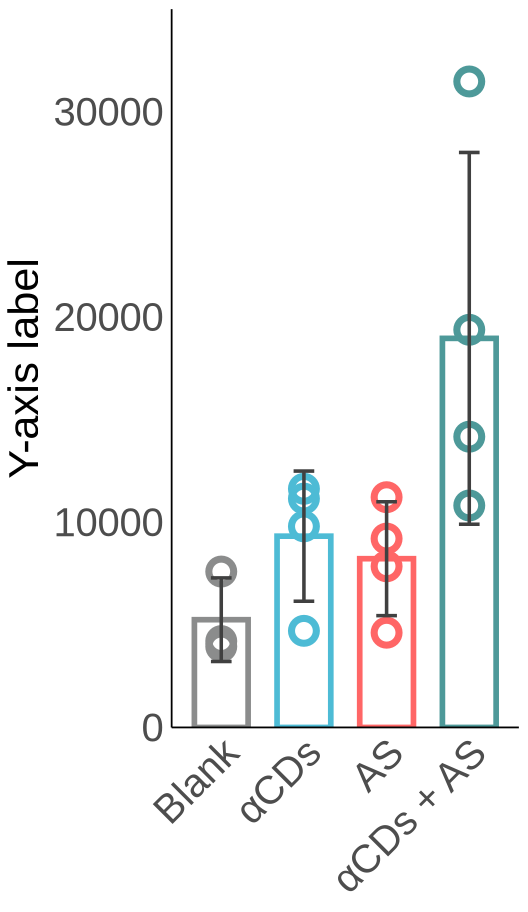

In [11]:

ylim <- c(0, 35000)
width <- 4.4
height <- 7.6

p <- create_complete_barplot(
  df,
  width = width,
  height = height,
  ylim = ylim,
  scale_color_manual.values = scale_color_manual.values,
  filename = paste(filename, '-barplot', sep=''),
  ylabel = ylabel
)

p


## 📐 Add p-values to Plot

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs

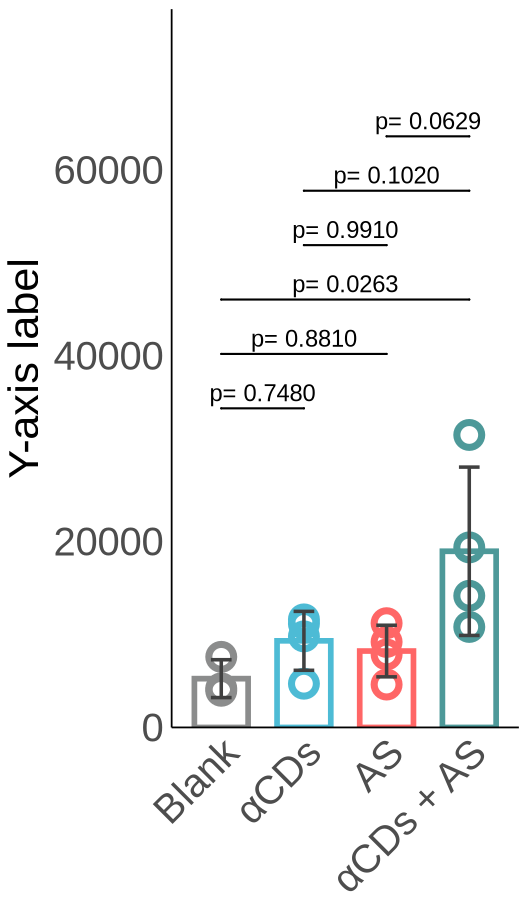

In [12]:

pwc <- rstatix::add_xy_position(pwc, x = "x")
p_stats <- add_stat_annotations_auto(p, pwc, y.buffer = 0.5)
p_stats


## 🧩 Arrange Plots Side-by-Side

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs + AS' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'αCDs' in 'mbcsToSbcs': dot substituted for <b1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(

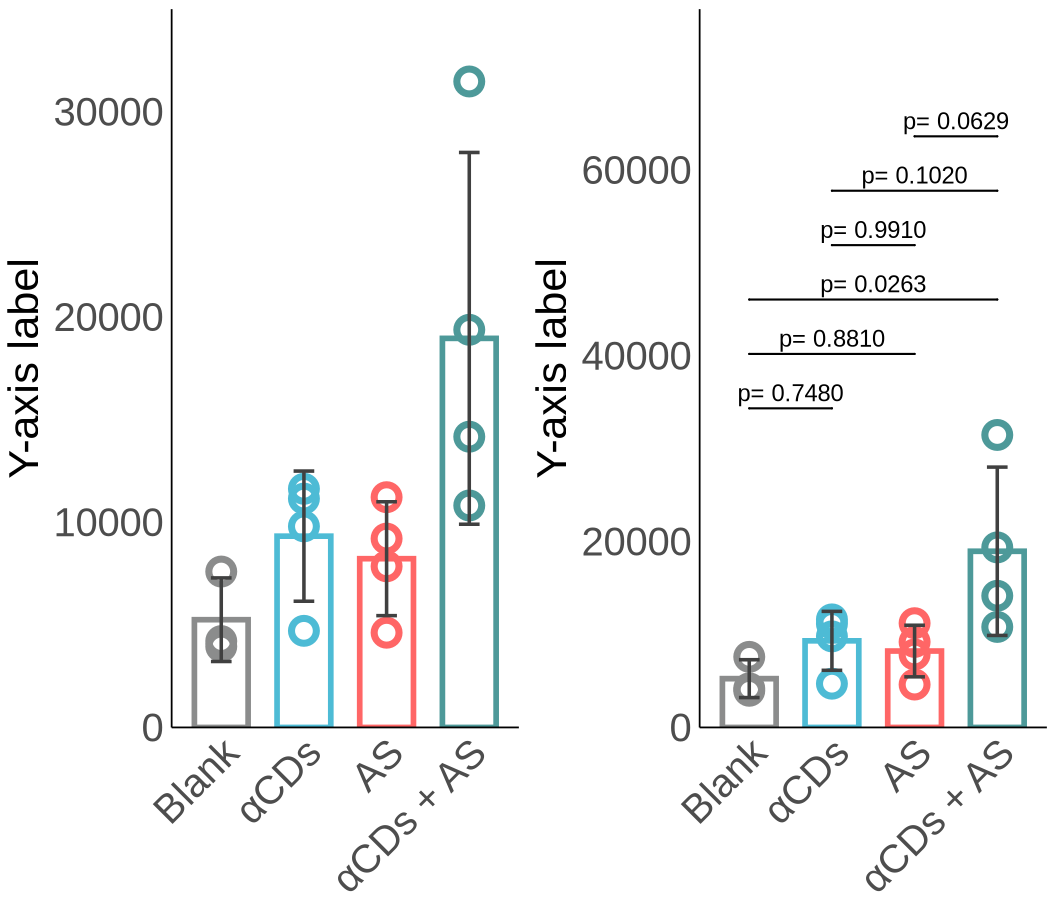

In [13]:

width_aligned <- 2 * width
options(repr.plot.width = width_aligned)

aligned_plots <- ggpubr::ggarrange(
  p, p_stats,
  nrow = 1,
  align = "hv",
  common.legend = FALSE
)

aligned_plots


## 💾 Export Plots

In [14]:

fileoutput <- paste0(filename, "-barplot_stats.svg")
ggplot2::ggsave(file = fileoutput, plot = aligned_plots, width = width_aligned, height = height)

fileoutput <- paste0(filename, "-barplot_stats.png")
ggplot2::ggsave(file = fileoutput, plot = aligned_plots, width = width_aligned, height = height)


## 📚 References


- [ANOVA in R (datanovia.com)](https://www.datanovia.com/en/lessons/anova-in-r/)
- [ggplot2 Bar Plot Guide](http://www.sthda.com/english/wiki/ggplot2-line-plot-quick-start-guide-r-software-and-data-visualization#line-graph-with-error-bars)
- [Theory: Parametric vs Non-parametric](https://www.youtube.com/watch?v=dyGjxBi4-qo)
- [Theory: One-way ANOVA](https://www.youtube.com/watch?v=_VFLX7xJuqk)
- [Implementation in R](https://www.youtube.com/watch?v=lpdFr5SZR0Q)
